In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_tdata=pd.read_csv("training_set_features.csv")

In [56]:
filtered=_tdata

In [64]:
filtered.fillna(0.0,inplace=True)

In [65]:
filtered

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,3.0,1.0,2.0,2.0,1.0,2.0,59.5,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,5.0,4.0,4.0,4.0,2.0,4.0,39.5,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,1.0,4.0,1.0,2.0,26.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,3.0,3.0,2.0,3.0,1.0,4.0,49.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,2.0,2.0,5.0,1.0,1.0,26.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,4.0,4.0,2.0,5.0,4.0,2.0,59.5,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,2.0,2.0,1.0,2.0,26.0,1.0,0.0


In [4]:
_tlabel=pd.read_csv("training_set_labels.csv")

In [69]:
_tlabel.drop(columns=['respondent_id'],inplace=True)

In [70]:
_tlabel

,xyz_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


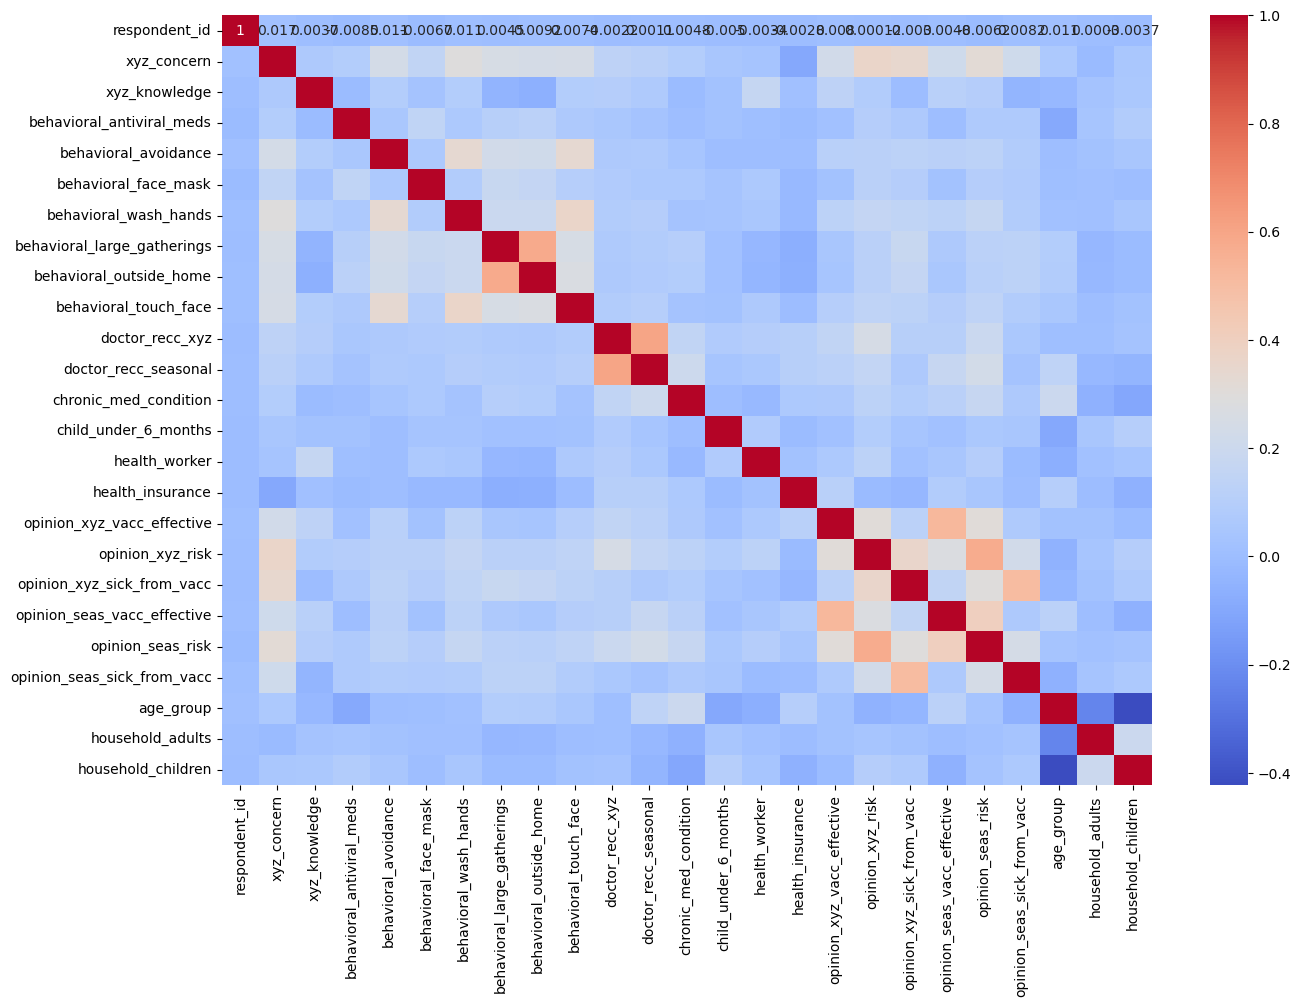

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = _tdata.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [6]:
_tlabel.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = filtered
y = _tlabel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

# Define the model
logreg = LogisticRegression(max_iter=2000, random_state=42)
multi_logreg = MultiOutputClassifier(logreg, n_jobs=-1)

# Train the model
multi_logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = multi_logreg.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc_xyz = roc_auc_score(y_test['xyz_vaccine'], y_pred_proba[0][:, 1])
roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_pred_proba[1][:, 1])
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

print(f'ROC AUC for xyz_vaccine: {roc_auc_xyz}')
print(f'ROC AUC for seasonal_vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')


ROC AUC for xyz_vaccine: 0.815535702982106
ROC AUC for seasonal_vaccine: 0.7904593101034675
Mean ROC AUC: 0.8029975065427868


In [93]:
print(X_test.shape)
respondent_ids = df.loc[X_test.index, 'respondent_id']
submission = pd.DataFrame({
    'respondent_id': respondent_ids,
    'xyz_vaccine': y_pred_proba[0][:, 1],
    'seasonal_vaccine': y_pred_proba[1][:, 1]
})
submission.to_csv('submission.csv', index=False)

(2671, 25)


In [91]:
from sklearn.metrics import roc_auc_score

# Calculate train scores
y_train_pred_proba = multi_logreg.predict_proba(X_train)
train_roc_auc_xyz = roc_auc_score(y_train['xyz_vaccine'], y_train_pred_proba[0][:, 1])
train_roc_auc_seasonal = roc_auc_score(y_train['seasonal_vaccine'], y_train_pred_proba[1][:, 1])
mean_train_roc_auc = (train_roc_auc_xyz + train_roc_auc_seasonal) / 2

# Calculate test scores
y_test_pred_proba = multi_logreg.predict_proba(X_test)
test_roc_auc_xyz = roc_auc_score(y_test['xyz_vaccine'], y_test_pred_proba[0][:, 1])
test_roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_test_pred_proba[1][:, 1])
mean_test_roc_auc = (test_roc_auc_xyz + test_roc_auc_seasonal) / 2

print(f'Train ROC AUC for xyz_vaccine: {train_roc_auc_xyz}')
print(f'Train ROC AUC for seasonal_vaccine: {train_roc_auc_seasonal}')
print(f'Mean Train ROC AUC: {mean_train_roc_auc}')
print(f'Test ROC AUC for xyz_vaccine: {test_roc_auc_xyz}')
print(f'Test ROC AUC for seasonal_vaccine: {test_roc_auc_seasonal}')
print(f'Mean Test ROC AUC: {mean_test_roc_auc}')


Train ROC AUC for xyz_vaccine: 0.8086215700605504
Train ROC AUC for seasonal_vaccine: 0.7804757371412229
Mean Train ROC AUC: 0.7945486536008866
Test ROC AUC for xyz_vaccine: 0.815535702982106
Test ROC AUC for seasonal_vaccine: 0.7904593101034675
Mean Test ROC AUC: 0.8029975065427868
